## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
%matplotlib inline

In [229]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53,07/01/2010,06/30/2013


****
## Preliminary analysis

In [12]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values(by='Number of Discharges')

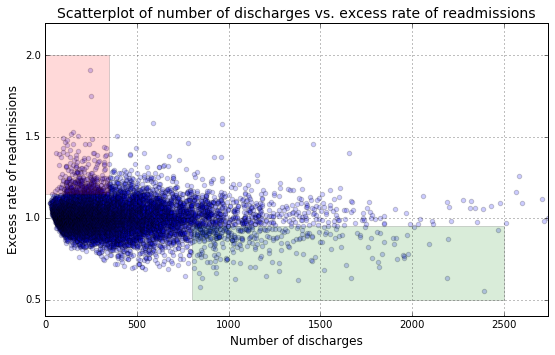

In [35]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

A. Do you agree with the above analysis and recommendations? Why or why not?

While I agree with the analysis that the rate of readmissions is trending down with increasing number of discharges and there is a correlation between them, I would not conclude by saying that hospitals with lower discharges are small in capacity and are below quality. Though that might be one of the reasons, I feel, it also depends on other factors such as - the type of hospital.
For example, a teaching hospital could take more time on a discharge of a patient as there could be multiple tests by multiple people and hence delaying the discharge which affects the overall number of discharges. It can also depend on the location of the hospital. If a hospital is located in a less populous area, the number of admissions and discharges may be less even though they have quality staff and equipment.

I like the recommendations. I would like to add more to it. Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges. Identifying facilities that are performing poor interms of readmission rate and asking them to merge with a bigger hospital near to the location would be a good idea.

I would like to add few more points to my analysis. From the below two plots, it is evident that patients with the measure-'READM-30-HIP-KNEE-HRRP' are more likely to be readmitted in a hospital with a smaller capacity than a hospital with a larger capcity. The minimum number of measure records considered here is 800. 


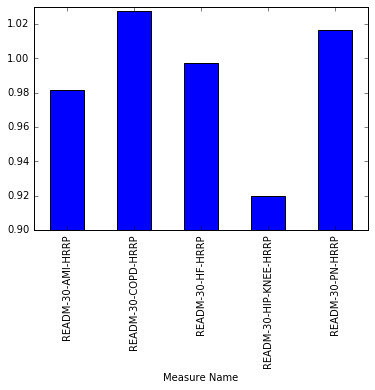

In [241]:
# Plot between measures and Readmission ratio of hospitals with larger capacity
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
a = a.groupby(by='Measure Name')
a = a['Excess Readmission Ratio'].mean()
a.plot(kind = 'bar', ylim=[0.9,1.03])

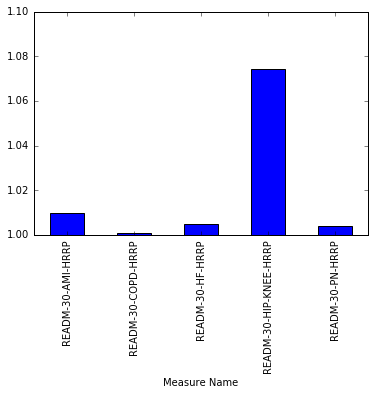

In [240]:
# Plot between measures and Readmission ratio of hospitals with samller capacity
a = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500]
a =a.groupby(by='Measure Name')
a=a['Excess Readmission Ratio'].mean()
a.plot(kind = 'bar', ylim=[1,1.1])

Hence I would like to make a recommendation that, smaller hospitals that deal with 'READM-30-HIP-KNEE-HRRP' should probably get some expertise and training from the bigger hospitals and if possible, they could be consolidated with the bigger hospitals in a near by location.

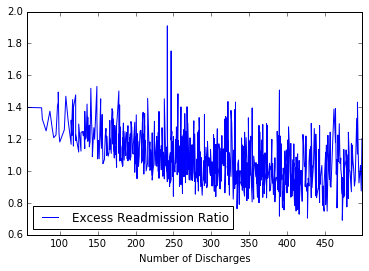

In [243]:
# Plot between no of discharges and readmission ratio of smaller hospitals in measure - 'READM-30-HIP-KNEE-HRRP'
b = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500]
b = b[clean_hospital_read_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP']
b = b[['Number of Discharges','Excess Readmission Ratio']]
b.dropna().set_index('Number of Discharges').plot()

And the above plot further shows evidence that the, however the small the hospital is and however bad they perform in any specific measure, there is co relation between - the number of discharges and the excess readmission ratio

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [245]:
# I would want to prove that the number of discharges has an impact on the rate of readmissions
# Let us consider two groups - 1)Hospitals with number of discharges < 500  2) Hospitals with number of discharges > 1000

# Let us consider our sample statistic to be the mean
# H0: There is no impact => m1 = mean(hospitals with discharges < 500) = m2 = mean(hospitals with discharges> 1000)
# H1: There is a impact => m1 > m2
# Where m1 and m2 are the population means
hospitals1 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 500]
hospitals2 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]
hospitals1_size = len(hospitals1)
hospitals2_size = len(hospitals2)
all_hospitals_size = len(clean_hospital_read_df)
sample_mean_m1 = hospitals1['Excess Readmission Ratio'].mean()
sample_mean_m2 = hospitals2['Excess Readmission Ratio'].mean()
sample_var_m1 = hospitals1['Excess Readmission Ratio'].var()
sample_var_m2 = hospitals2['Excess Readmission Ratio'].var()

print 'Means of both the samples:',sample_mean_m1,sample_mean_m2
print 'Variances of both the samples:',sample_var_m1,sample_var_m2

sample_mean_diff = sample_mean_m1 - sample_mean_m2

# let us now consider a sampling distribution with means of both groups as m1_sample_dist and m2_sample_dist
sample_dist_mean_diff = 0 #(since m1_sample_dist-m2_sample_dist= m1-m2= 0)
sample_dist_var_diff = (sample_var_m1/hospitals1_size) + (sample_var_m2/hospitals2_size)
sample_dist_std_diff = np.sqrt(sample_dist_var_diff)

print 'Mean and Standard deviation of the difference in distributions:',sample_dist_mean_diff,sample_dist_std_diff

# z-score
z_score = (sample_dist_mean_diff - sample_mean_diff) / sample_dist_std_diff
print 'Z-Score =',z_score

# p-Value
p_value = stats.norm.cdf(z_score)
print 'P-Value =',p_value


Means of both the samples: 1.01113108184 0.978335421166
Variances of both the samples: 0.00750381870618 0.0144017648898
Mean and Standard deviation of the difference in distributions: 0 0.00565176342342
Z-Score = -5.80273062023
P-Value = 3.2621782666e-09


Since the p-value is way below our alpha threshold (0.01), we can consider this is as statistically significant. Hence we can reject the NULL hypothesis which means the number of discharges has an impact on the rate of readmissions